In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('employees.csv')

In [17]:

#Display the first 10 rows of the dataset
df.head(10)

,employee_id,first_name,last_name,department,job_title,salary,hire_date,age,gender,city,performance_score,years_experience,is_remote,bonus_percentage
0,1,John,Smith,Engineering,Software Engineer,85000,2019-03-15,32,Male,New York,4.2,7,True,12
1,2,Sarah,Johnson,Marketing,Marketing Manager,72000,2020-06-22,28,Female,Los Angeles,4.5,5,False,15
2,3,Michael,Williams,Engineering,Senior Developer,105000,2017-01-10,38,Male,Chicago,4.8,12,True,18
3,4,Emily,Brown,HR,HR Specialist,55000,2021-09-01,26,Female,Houston,3.9,3,False,8
4,5,David,Jones,Sales,Sales Representative,62000,2018-11-30,35,Male,Phoenix,4.1,8,False,20
5,6,Jessica,Garcia,Engineering,Data Scientist,95000,2019-08-14,30,Female,San Diego,4.6,6,True,14
6,7,Christopher,Martinez,Finance,Financial Analyst,68000,2020-02-28,29,Male,Dallas,3.8,4,False,10
7,8,Amanda,Rodriguez,Marketing,Content Specialist,52000,2022-01-15,24,Female,San Jose,4.0,2,True,7
8,9,James,Wilson,Engineering,DevOps Engineer,92000,2018-05-20,34,Male,Austin,4.4,9,True,16
9,10,Ashley,Anderson,Sales,Sales Manager,78000,2016-12-05,40,Female,Jacksonville,4.7,14,False,22


In [18]:
df['hire_date'].apply(type).value_counts()

hire_date
<class 'str'>    40
Name: count, dtype: int64

In [19]:
#before converting the hire date to datetime
df.dtypes

employee_id            int64
first_name            object
last_name             object
department            object
job_title             object
salary                 int64
hire_date             object
age                    int64
gender                object
city                  object
performance_score    float64
years_experience       int64
is_remote               bool
bonus_percentage       int64
dtype: object

In [20]:
salary = df['salary'].sum()

In [21]:
df['hire_date'] = pd.to_datetime(df['hire_date'].astype(str).str.strip(), errors='coerce')



df.dtypes




employee_id                   int64
first_name                   object
last_name                    object
department                   object
job_title                    object
salary                        int64
hire_date            datetime64[ns]
age                           int64
gender                       object
city                         object
performance_score           float64
years_experience              int64
is_remote                      bool
bonus_percentage              int64
dtype: object

In [22]:
df.head(3)

,employee_id,first_name,last_name,department,job_title,salary,hire_date,age,gender,city,performance_score,years_experience,is_remote,bonus_percentage
0,1,John,Smith,Engineering,Software Engineer,85000,2019-03-15,32,Male,New York,4.2,7,True,12
1,2,Sarah,Johnson,Marketing,Marketing Manager,72000,2020-06-22,28,Female,Los Angeles,4.5,5,False,15
2,3,Michael,Williams,Engineering,Senior Developer,105000,2017-01-10,38,Male,Chicago,4.8,12,True,18


In [23]:

#check missing values
df.isnull().sum()

employee_id          0
first_name           0
last_name            0
department           0
job_title            0
salary               0
hire_date            0
age                  0
gender               0
city                 0
performance_score    0
years_experience     0
is_remote            0
bonus_percentage     0
dtype: int64

In [24]:
salary_of_employees = df['salary'].agg({'mean': np.mean, 'median': np.median, 'std': np.std})

print(salary_of_employees)

mean      79425.000000
median    73500.000000
std       26078.665512
Name: salary, dtype: float64


C:\Users\francis\AppData\Local\Temp\ipykernel_30532\2524473420.py:1: FutureWarning: The provided callable <function mean at 0x0000020D776CD440> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  salary_of_employees = df['salary'].agg({'mean': np.mean, 'median': np.median, 'std': np.std})
C:\Users\francis\AppData\Local\Temp\ipykernel_30532\2524473420.py:1: FutureWarning: The provided callable <function median at 0x0000020D77801620> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  salary_of_employees = df['salary'].agg({'mean': np.mean, 'median': np.median, 'std': np.std})
C:\Users\francis\AppData\Local\Temp\ipykernel_30532\2524473420.py:1: FutureWarning: The provided callable <function std at 0x0000020D776CD580> is currently using Series.std. In a futur

In [25]:
engineer_employee_earn_90k = df[(df['salary'] >= 90000) & (df['department'] == 'Engineering')] 

engineer_employee_earn_90k[['first_name', 'last_name', 'salary']]


,first_name,last_name,salary
2,Michael,Williams,105000
5,Jessica,Garcia,95000
8,James,Wilson,92000
21,Rachel,Clark,110000
25,Samantha,Walker,125000
28,Brandon,King,98000
31,Christina,Torres,102000
35,Danielle,Green,90000
39,Vanessa,Gonzalez,115000


In [ ]:
df.groupby('department')['salary'].mean().sort_values(ascending=False)



department
Engineering    96846.153846
Finance        84285.714286
Sales          73857.142857
Marketing      63714.285714
HR             60833.333333
Name: salary, dtype: float64

In [ ]:
df.groupby('department')['salary'].sum().sort_values(ascending=False)

department
Engineering    96846.153846
Finance        84285.714286
Sales          73857.142857
Marketing      63714.285714
HR             60833.333333
Name: salary, dtype: float64

In [27]:
well = df[df['department'] == 'Eengineering']

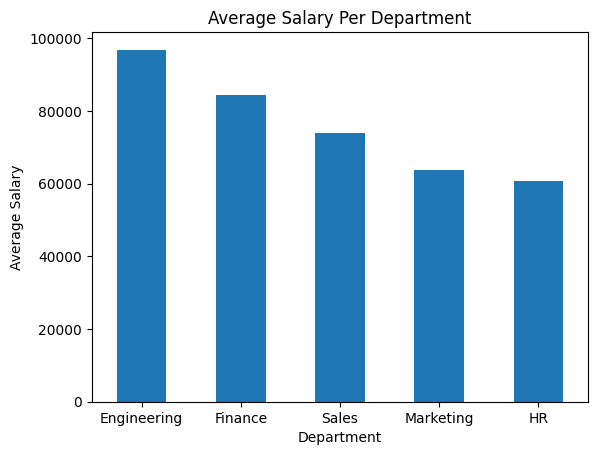

In [28]:
average_salary_per_department = df.groupby('department').agg(
    average_salary=('salary','mean')
).sort_values(by='average_salary',ascending=False)

average_salary_per_department.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Average Salary Per Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.legend().set_visible(False)
plt.show()

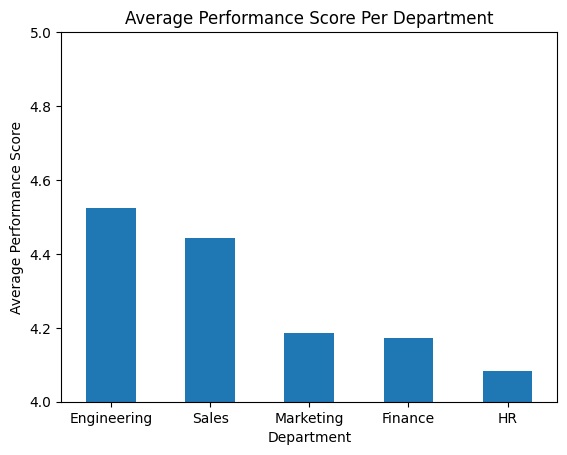

In [29]:
average_performance_score = df.groupby('department').agg(
    avg_performance=('performance_score','mean')
).sort_values(by='avg_performance',ascending=False)

average_performance_score.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Average Performance Score Per Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.ylim(4.0,5)
plt.legend().set_visible(False)
plt.show()



In [30]:

##Find how many employees are in each department. 
# Display both the count and the percentage of total employees.



employee_in_each_department = df.groupby('department').agg(
    employee_count=('employee_id','count')
) 

employee_in_each_department['percentage_of_employee'] =(
    employee_in_each_department['employee_count']/df.shape[0] * 100
)

print(employee_in_each_department)


             employee_count  percentage_of_employee
department                                         
Engineering              13                    32.5
Finance                   7                    17.5
HR                        6                    15.0
Marketing                 7                    17.5
Sales                     7                    17.5


In [31]:
#Create a new column called `salary_tier` based on salary:

#- `'Low'` if salary < 60,000
#- `'Medium'` if salary between 60,000 and 90,000
#- `'High'` if salary > 90,000

bins = [0,60000,90000,120000]
labels =['low','medium','high']

df['salary_tier'] = pd.cut(df['salary'],bins=bins,labels=labels,right=False)

df[['first_name','last_name','salary','salary_tier']].head().sort_values(by='salary',ascending=False)

,first_name,last_name,salary,salary_tier
2,Michael,Williams,105000,high
0,John,Smith,85000,medium
1,Sarah,Johnson,72000,medium
4,David,Jones,62000,medium
3,Emily,Brown,55000,low


In [32]:
top_5_employees = df.nlargest(5,'salary')[['first_name','last_name','department','job_title','salary']]

top_5_employees

,first_name,last_name,department,job_title,salary
38,Steven,Baker,Finance,CFO,180000
25,Samantha,Walker,Engineering,System Architect,125000
39,Vanessa,Gonzalez,Engineering,Product Manager,115000
21,Rachel,Clark,Engineering,ML Engineer,110000
2,Michael,Williams,Engineering,Senior Developer,105000


In [33]:
df.head(1)

,employee_id,first_name,last_name,department,job_title,salary,hire_date,age,gender,city,performance_score,years_experience,is_remote,bonus_percentage,salary_tier
0,1,John,Smith,Engineering,Software Engineer,85000,2019-03-15,32,Male,New York,4.2,7,True,12,medium


In [34]:
### Problem 10: Multiple Conditions

#Find all employees who:

#- Are **remote workers** (`is_remote == True`)
#- Have **more than 5 years of experience**
#- Have a **performance score above 4.0**


employee_remote_5_performance_5_years = df[(df['is_remote']==True) & 
(df['years_experience']>5) &
(df['performance_score']>4.0)]

employee_remote_5_performance_5_years[['first_name','last_name','years_experience','performance_score']].head()

,first_name,last_name,years_experience,performance_score
0,John,Smith,7,4.2
2,Michael,Williams,12,4.8
5,Jessica,Garcia,6,4.6
8,James,Wilson,9,4.4
12,Daniel,Moore,6,4.1
